# 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('Downloads/vgames2.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

Name Platform    Year  \
0                        Candace Kane's Candy Factory       DS  2008.0   
1                                      The Munchables      Wii  2009.0   
2      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0   
3                    Deal or No Deal: Special Edition       DS  2010.0   
4           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010.0   
...                                               ...      ...     ...   
16593                         Ice Age 2: The Meltdown       GC  2006.0   
16594                     Rainbow Islands: Revolution      PSP  2005.0   
16595                                        NBA 2K16      PS3  2015.0   
16596                     Toukiden: The Age of Demons      PSV  2013.0   
16597                        The King of Fighters '95       PS  1996.0   

           Genre                    Publisher NA_Sales EU_Sales JP_Sales  \
0         Action                    Destineer     0.04        0        0   
1         Action           Namco Bandai Games     0.17        0        0   
2      Adventure                    Alchemist        0        0     0.02   
3           Misc                    Zoo Games     0.04        0        0   
4       Platform                  D3Publisher     0.12     0.09        0   
...          ...                          ...      ...      ...      ...   
16593   Platform                Vivendi Games     0.15     0.04        0   
16594     Action            Rising Star Games     0.01        0        0   
16595     Sports         Take-Two Interactive     0.44     0.19     0.03   
16596     Action                   Tecmo Koei     0.05     0.05     0.25   
16597   Fighting  Sony Computer Entertainment        0        0     0.16   

      Other_Sales  
0               0  
1            0.01  
2               0  
3               0  
4            0.04  
...           ...  
16593        0.01  
16594           0  
16595        0.13  
16596        0.03  
16597        0.01  

[16598 rows x 9 columns]

In [3]:
# 'Sales' 단위 통일
target_c = df.loc[:, 'NA_Sales':'Other_Sales'].columns

for col in target_c:
    index_k = df[df[col].str.contains('K')].index
    df.loc[index_k, col] = df.loc[index_k, col].str.replace('K', '')
    
    index_m = df[df[col].str.contains('M')].index
    df.loc[index_m, col] = df.loc[index_m, col].str.replace('M', '')
    
    df[col] = pd.to_numeric(df[col])
    
    df.loc[index_k, col] *= 0.001

In [4]:
# Total 컬럼 생성
df['Total_Sales'] = (df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
 9   Total_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [6]:
# 'Year'표기 오류 수정
condition_Y1 = df[(df['Year'] < 100) & (df['Year'] > 80)]
condition_Y2 = df[df['Year'] < 22]

df.loc[condition_Y1.index, 'Year'] += 1900
df.loc[condition_Y2.index, 'Year'] += 2000

In [7]:
# 'Platform' 차이로 중복되는 'Name'이 있을 수 있다.
df[df.duplicated(['Name'])]

Name Platform    Year       Genre  \
131             Call of Duty 4: Modern Warfare       PC  2007.0     Shooter   
230              IL-2 Sturmovik: Birds of Prey       DS  2009.0  Simulation   
250                           NASCAR Unleashed      3DS  2011.0      Racing   
279    The Incredibles: Rise of the Underminer       XB  2005.0      Action   
343                                   NBA 2K12     X360  2011.0      Sports   
...                                        ...      ...     ...         ...   
16591                          Madden NFL 2005      PS2  2004.0      Sports   
16593                  Ice Age 2: The Meltdown       GC  2006.0    Platform   
16595                                 NBA 2K16      PS3  2015.0      Sports   
16596              Toukiden: The Age of Demons      PSV  2013.0      Action   
16597                 The King of Fighters '95       PS  1996.0    Fighting   

                         Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
131                     Activision      0.00      1.12      0.00         0.03   
230                      505 Games      0.06      0.00      0.00         0.00   
250                     Activision      0.18      0.00      0.00         0.01   
279                            THQ      0.06      0.02      0.00         0.00   
343           Take-Two Interactive      2.31      0.14      0.01         0.16   
...                            ...       ...       ...       ...          ...   
16591              Electronic Arts      4.18      0.26      0.01         0.08   
16593                Vivendi Games      0.15      0.04      0.00         0.01   
16595         Take-Two Interactive      0.44      0.19      0.03         0.13   
16596                   Tecmo Koei      0.05      0.05      0.25         0.03   
16597  Sony Computer Entertainment      0.00      0.00      0.16         0.01   

       Total_Sales  
131           1.15  
230           0.06  
250           0.19  
279           0.08  
343           2.62  
...            ...  
16591         4.53  
16593         0.20  
16595         0.79  
16596         0.38  
16597         0.17  

[5105 rows x 10 columns]

In [8]:
# 동일한 'Platform' 중복 된 'Name'존재
df[df.duplicated(['Name', 'Platform'])]

Name Platform    Year     Genre  \
8717                 Madden NFL 13      PS3  2012.0    Sports   
9184   Wii de Asobu: Metroid Prime      Wii     NaN   Shooter   
12529  Need for Speed: Most Wanted     X360  2005.0    Racing   
13808  Need for Speed: Most Wanted       PC  2012.0    Racing   
15705           Sonic the Hedgehog      PS3  2006.0  Platform   

             Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales  
8717   Electronic Arts      0.00      0.01      0.00         0.00         0.01  
9184          Nintendo      0.00      0.00      0.02         0.00         0.02  
12529  Electronic Arts      1.00      0.17      0.02         0.10         1.29  
13808  Electronic Arts      0.00      0.06      0.00         0.02         0.08  
15705             Sega      0.41      0.07      0.04         0.66         1.18

In [9]:
df[df.duplicated(['Name', 'Platform'], keep='last')]

Name Platform    Year     Genre        Publisher  \
1318  Need for Speed: Most Wanted     X360  2012.0    Racing  Electronic Arts   
2673  Need for Speed: Most Wanted       PC  2005.0    Racing  Electronic Arts   
7346                Madden NFL 13      PS3  2012.0    Sports  Electronic Arts   
8055  Wii de Asobu: Metroid Prime      Wii     NaN   Shooter         Nintendo   
8651           Sonic the Hedgehog      PS3     NaN  Platform              NaN   

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales  
1318      0.62      0.80      0.01         0.15         1.58  
2673      0.02      0.23      0.00         0.05         0.30  
7346      2.11      0.23      0.00         0.22         2.56  
8055      0.00      0.00      0.02         0.00         0.02  
8651      0.00      0.48      0.00         0.00         0.48

In [10]:
# 중복 된 값의'Year'와 'Sales' 불일치 / 부정확한 데이터 제거
df.drop_duplicates(['Name', 'Platform'], keep=False, inplace=True)

In [11]:
# 'Year'와 'Year', 'Publisher' 결측치 분리 처리
df.loc[:, 'Year'].fillna(9999, inplace=True)
df.loc[:, 'Genre'].fillna('etc', inplace=True)
df.loc[:, 'Publisher'].fillna('Unknown', inplace=True)

In [12]:
df['Platform'].unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

# 지역에 따라 선호하는 장르가 다를까?

In [13]:
# column별 persentage 함수
df_gen = df.groupby(by='Genre').sum()
df_gen.drop('Year', axis=1, inplace=True)

def percol(df):
    for col in df.columns:
        col_sum = df.loc[:, col].sum()
        for ind in df.index:
            df.loc[ind, col] = (df.loc[ind, col] / col_sum) * 100

In [14]:
# 각 지역의 장르별 총 판매량 비율 / 시장 규모가 다르기 때문
percol(df_gen)
df_gen

NA_Sales   EU_Sales   JP_Sales  Other_Sales  Total_Sales
Genre                                                                  
Action        19.932829  21.469688  12.231682    23.407194    19.547098
Adventure      2.407497   2.633548   4.024293     2.110351     2.676933
Fighting       5.085684   4.161870   6.765770     4.599837     5.033491
Misc           9.297551   8.731621   8.154713     9.295085     8.977216
Platform      10.162938   8.266998  10.117669     6.386291     9.301070
Puzzle         2.810570   2.085869   4.405419     1.571778     2.733060
Racing         8.101322   9.697049   4.366687     9.639068     8.133286
Role-Playing   7.280822   7.548271  26.721460     7.150838    10.159368
Shooter       13.259235  12.871698   2.962251    12.886824    11.627993
Simulation     4.168803   4.660620   4.934504     3.952043     4.394651
Sports        15.457791  15.469886  10.486401    16.879041    14.867770
Strategy       1.565352   1.863426   3.831406     1.426150     1.962657
etc            0.469606   0.539456   0.997746     0.695499     0.585407

In [15]:
# # tidy 데이터 생성
# tidy_gen = df_gen.reset_index()
# tidy_gen = tidy_gen.melt(id_vars='Genre', value_vars=['NA_Sales', 'EU_Sales','JP_Sales', 'Other_Sales'])
# tidy_gen.head()
# # 균형설계자료 확인
# tidy_gen.groupby('variable').agg(len)
# tidy_gen.groupby('Genre').agg(len)
# tidy_gen.groupby(['variable', 'Genre']).agg(len)
# # two-way-ANOVA Test
# model = ols('value ~ C(Genre) * C(variable)', tidy_gen).fit()
# anova_lm(model)

<AxesSubplot:xlabel='NA_Sales', ylabel='Genre'>

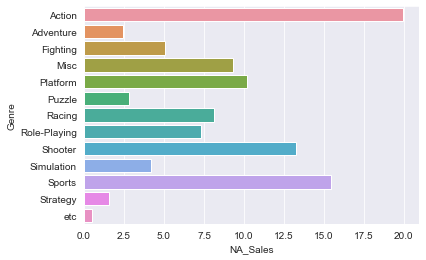

In [16]:
sns.barplot(data=df_gen, x='NA_Sales', y=df_gen.index)

<AxesSubplot:xlabel='EU_Sales', ylabel='Genre'>

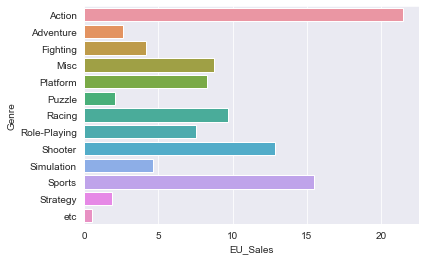

In [17]:
sns.barplot(data=df_gen, x='EU_Sales', y=df_gen.index)

<AxesSubplot:xlabel='JP_Sales', ylabel='Genre'>

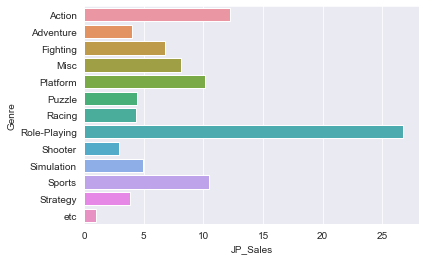

In [18]:
sns.barplot(data=df_gen, x='JP_Sales', y=df_gen.index)

<AxesSubplot:xlabel='Other_Sales', ylabel='Genre'>

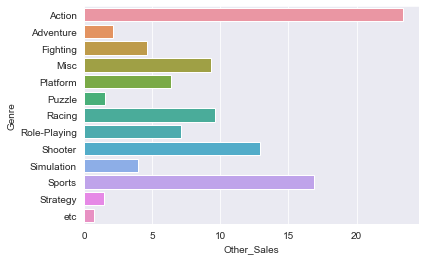

In [19]:
sns.barplot(data=df_gen, x='Other_Sales', y=df_gen.index)

In [20]:
# 연도별 게임 트렌드가 있을까?
# 트렌드 : 연도별 판매량이 많은 장르

In [21]:
# 콘솔 게임 평균 개발 기간 29month / 3년마다의 판매 트랜드
def thr(before, after):
    for x in range(1980, 2020, 3):
        start = x
        end = x + 3
        condition = before[(before.index >= start) & (before.index < end)]
        after.loc['{}~{}'.format(start, end-1), before.columns] = condition.sum()

In [22]:
# 연도별 판매량이 많은 장르 / 플랫폼 합

In [23]:
# 각 연도 장르별 총 판매량
df_YGS = pd.DataFrame()

for years in range(1980, 2017):
    for genres in df['Genre'].unique():
        condition = df['Genre'].str.contains(genres) & (df['Year'] == years)
        df_YGS.loc[years, genres] = df.loc[condition, 'Total_Sales'].sum()

In [24]:
# 오차 약 1.12 %
df_YGS.head()

Action  Adventure  Misc  Platform  Sports  Simulation  Racing  \
1980    0.34        0.0  2.70      0.00    0.00        0.00    0.00   
1981   14.79        0.0  0.00      6.92    0.78        0.44    0.48   
1982    6.50        0.0  0.87      5.03    1.06        0.00    1.57   
1983    2.86        0.4  2.14      6.93    3.20        0.00    0.00   
1984    1.85        0.0  1.45      0.69    6.17        0.00    5.95   

      Role-Playing  Puzzle  Strategy  Fighting  Shooter  etc  
1980           0.0    0.00       0.0      0.77     7.07  0.5  
1981           0.0    2.25       0.0      0.00    10.02  0.0  
1982           0.0   10.04       0.0      0.00     3.81  0.0  
1983           0.0    0.78       0.0      0.00     0.49  0.0  
1984           0.0    3.14       0.0      0.00    31.10  0.0

In [25]:
# 3년마다의 판매량 트랜드
# 장르에 따른 년도별 판매량 비율
df_3YGS = pd.DataFrame()
thr(df_YGS, df_3YGS)

percol(df_3YGS.T)
df_3YGS.sum(axis=1)

/var/folders/0p/k705g0x102v0x_kgxydj12kc0000gn/T/ipykernel_22983/1871285339.py:9: RuntimeWarning: invalid value encountered in double_scalars
  df.loc[ind, col] = (df.loc[ind, col] / col_sum) * 100


1980~1982    100.0
1983~1985    100.0
1986~1988    100.0
1989~1991    100.0
1992~1994    100.0
1995~1997    100.0
1998~2000    100.0
2001~2003    100.0
2004~2006    100.0
2007~2009    100.0
2010~2012    100.0
2013~2015    100.0
2016~2018    100.0
2019~2021      0.0
dtype: float64

<AxesSubplot:>

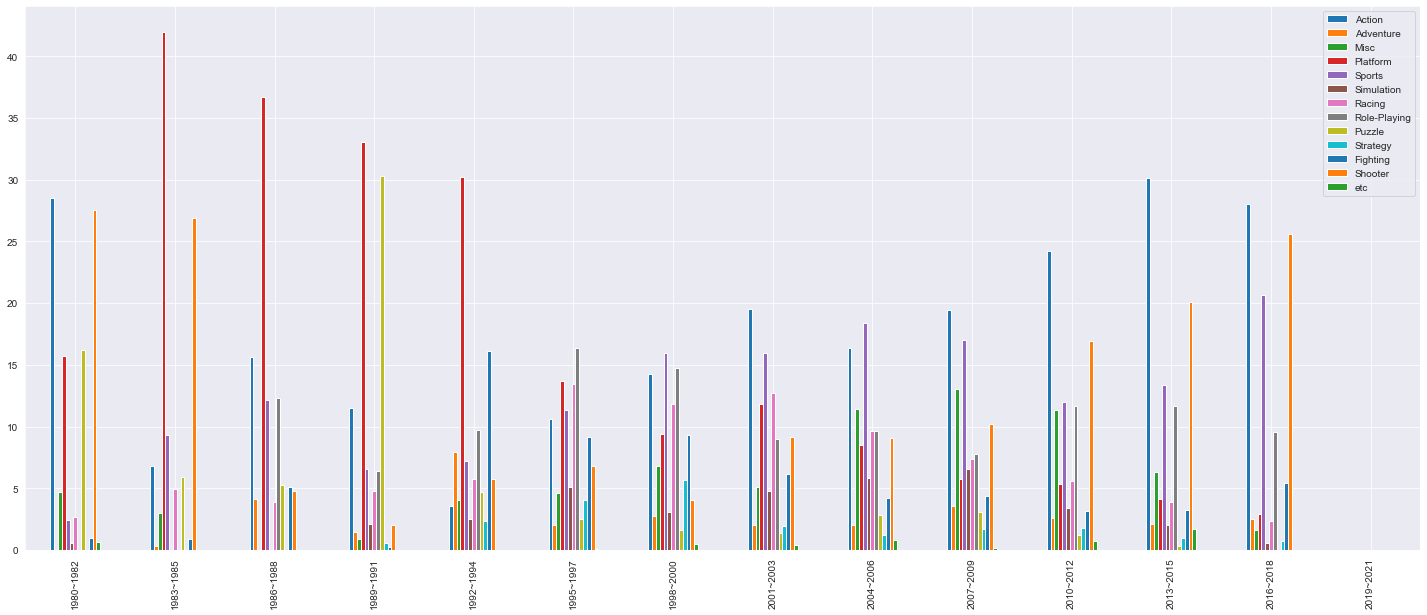

In [26]:
df_3YGS.plot(kind='bar', figsize=(25,10))

<AxesSubplot:>

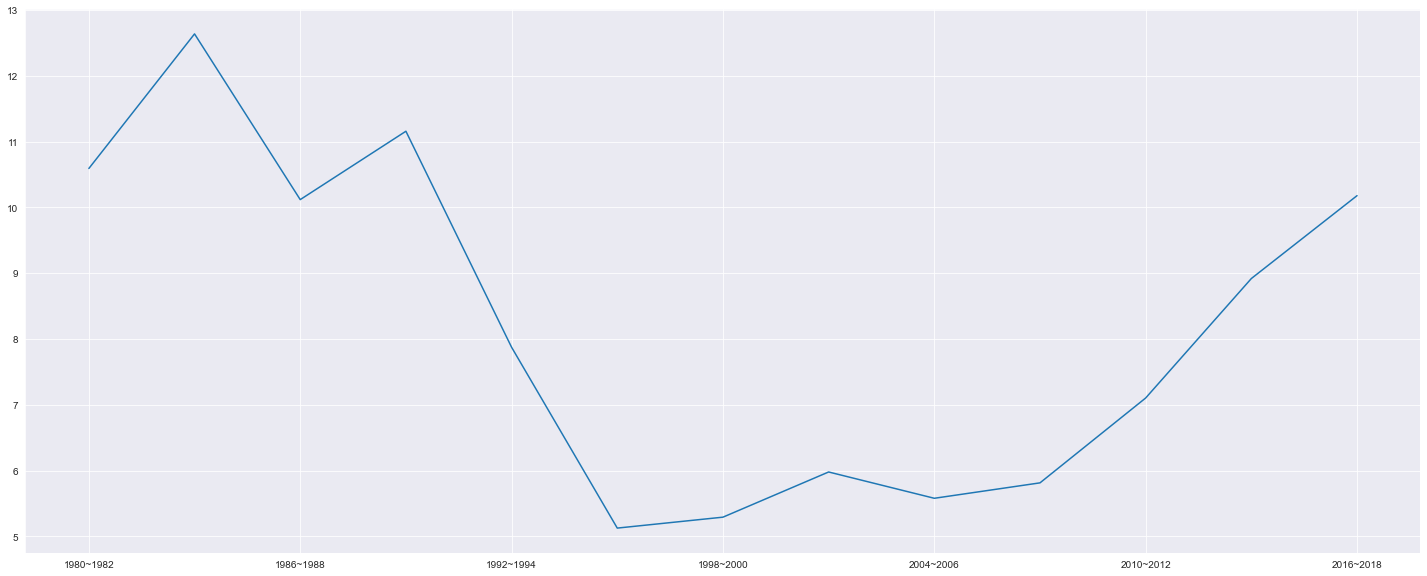

In [27]:
df_3YGS.T.describe().loc['std'].plot(x=df_3YGS.columns, figsize=(25,10))

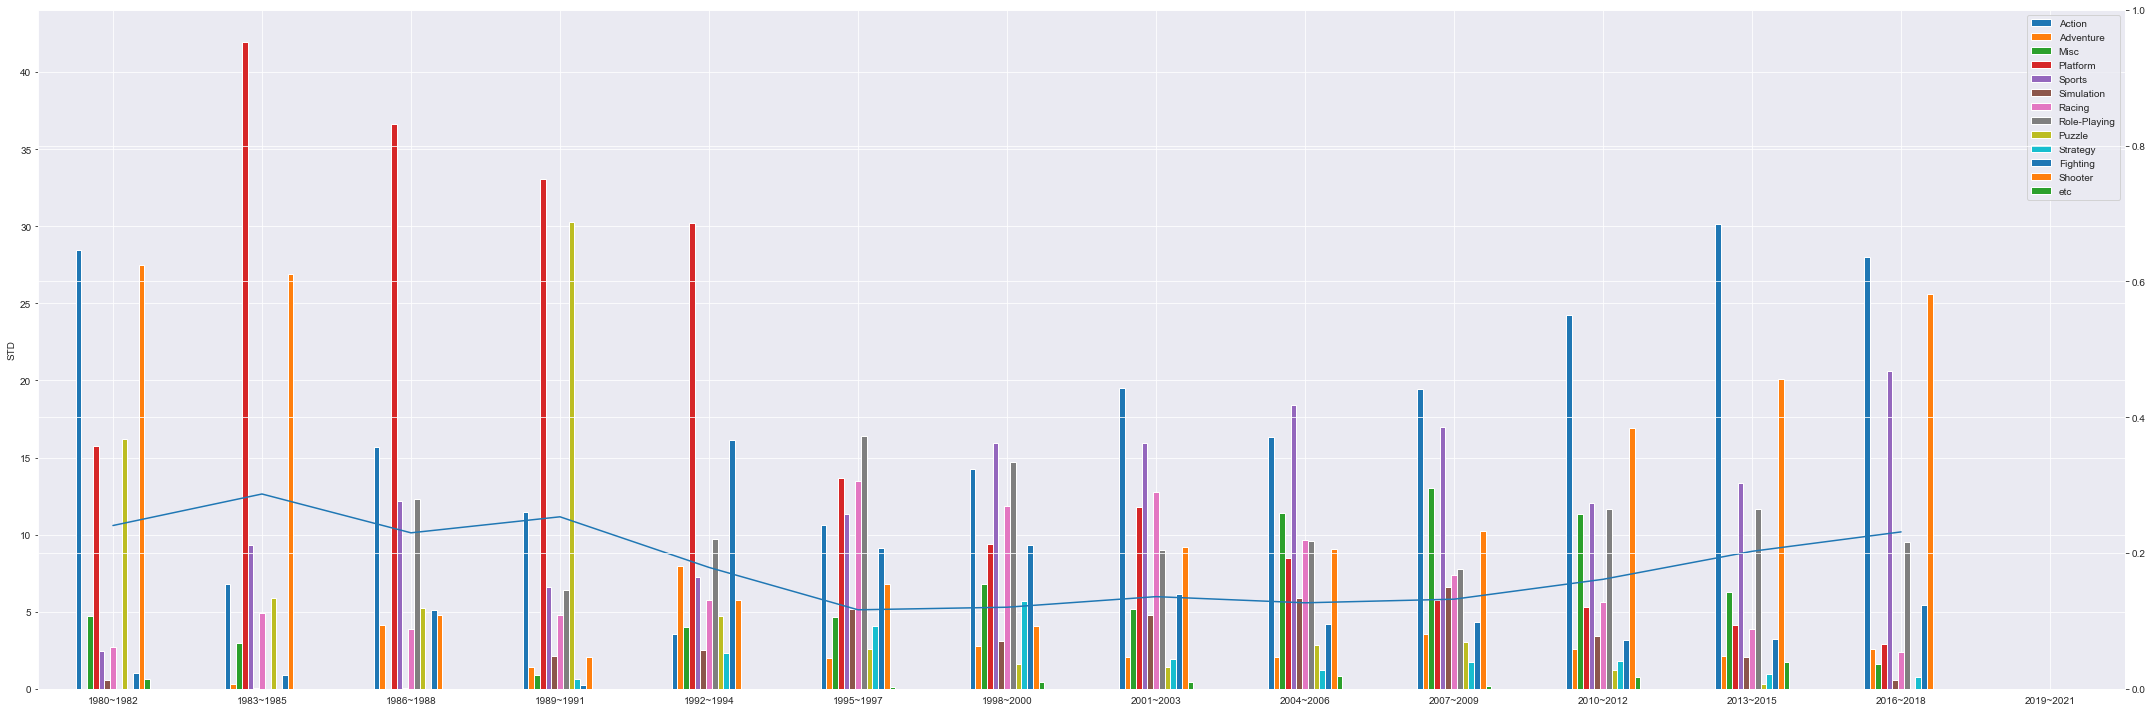

In [28]:
ax = df_3YGS.plot(kind='bar', figsize=(30,10))
ax.set_ylabel('Percent')

ax2 = df_3YGS.T.describe().loc['std'].plot(kind='line')
ax2.set_ylabel('STD')

ax1 = ax2.twinx()
plt.tight_layout()
plt.show()


In [29]:
df_top3 = pd.DataFrame(columns=['Top1', 'Top2', 'Top3'])

for x in df_3YGS.index:
    df_top3.loc[x] = df_3YGS.loc[x].sort_values(ascending = False).index[0:3]
    
df_top3

Top1          Top2          Top3
1980~1982        Action       Shooter        Puzzle
1983~1985      Platform       Shooter        Sports
1986~1988      Platform        Action  Role-Playing
1989~1991      Platform        Puzzle        Action
1992~1994      Platform      Fighting  Role-Playing
1995~1997  Role-Playing      Platform        Racing
1998~2000        Sports  Role-Playing        Action
2001~2003        Action        Sports        Racing
2004~2006        Sports        Action          Misc
2007~2009        Action        Sports          Misc
2010~2012        Action       Shooter        Sports
2013~2015        Action       Shooter        Sports
2016~2018        Action       Shooter        Sports
2019~2021        Action     Adventure          Misc

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(-2.0, 0, '2016~2018'),
  Text(0.0, 0, '1980~1982'),
  Text(2.0, 0, '1986~1988'),
  Text(4.0, 0, '1992~1994'),
  Text(6.0, 0, '1998~2000'),
  Text(8.0, 0, '2004~2006'),
  Text(10.0, 0, '2010~2012'),
  Text(12.0, 0, '2016~2018'),
  Text(14.0, 0, '')])

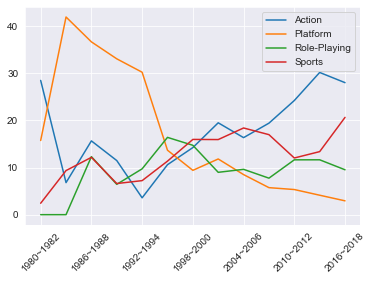

In [30]:
df_3YGS.loc[:, ['Action', 'Platform', 'Role-Playing', 'Sports']].plot()
plt.xticks(rotation =45)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(-2.0, 0, '2016~2018'),
  Text(0.0, 0, '1980~1982'),
  Text(2.0, 0, '1986~1988'),
  Text(4.0, 0, '1992~1994'),
  Text(6.0, 0, '1998~2000'),
  Text(8.0, 0, '2004~2006'),
  Text(10.0, 0, '2010~2012'),
  Text(12.0, 0, '2016~2018'),
  Text(14.0, 0, '')])

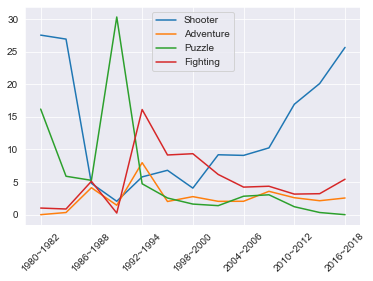

In [31]:
df_3YGS.loc[:, ['Shooter', 'Adventure', 'Puzzle', 'Fighting']].plot()
plt.xticks(rotation =45)

In [32]:
test = df[df['Year'] < 9999].sort_values(by='Year')

In [33]:
test = test[test['Genre'].str.contains('Shooter')]
test = test.groupby(by='Year').sum()

In [34]:
test['Total_Sales'].index

Float64Index([1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0,
              1988.0, 1989.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0,
              1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0,
              2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0,
              2013.0, 2014.0, 2015.0, 2016.0],
             dtype='float64', name='Year')

In [35]:
def compare(v1, v2):
    if v1 < v2:  
        try: value = round((v2 - v1)/v1*100,2)
        except: value = 100                       
    elif v1 > v2: 
        try: value = -round((v1 - v2)/v1*100,2) 
        except: value = -100                  
    else:        
        value = 0
    return value

In [36]:
total = pd.DataFrame(index=test['Total_Sales'].index, columns=['rate of increase'])

In [37]:
test.reset_index(inplace=True)
total.reset_index(inplace=True)

In [38]:
# total = pd.DataFrame(index=test['Total_Sales'].index, columns=['rate of increase'])
# total.loc[1990] = 0

for x in range(0, 35, 1):
    v1 = x
    v2 = x + 1
    total.loc[v1+1, 'rate of increase'] = compare(test.loc[v1, 'Total_Sales'], test.loc[v2, 'Total_Sales'])

<AxesSubplot:xlabel='Year'>

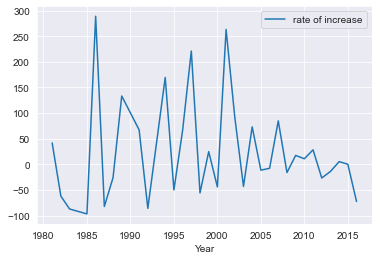

In [39]:
total.drop([4, 12]).plot(x='Year')

In [40]:
#  중복 'Platform'을 고려하지 않고, 가장 판매량이 많은 게임 

In [41]:
# 2015년 이후 판매량이 가장 많으 게임 100위
top100 = df[(df['Year'] < 9999) & (df['Year'] >= 2015)].sort_values(by='Year', ascending=False).reset_index()
top100 = top100.sort_values(by='Total_Sales', ascending=False).reset_index()
top100 = top100.iloc[0:100, 2:]
top100

Name Platform    Year         Genre  \
0      Call of Duty: Black Ops 3      PS4  2015.0       Shooter   
1                        FIFA 16      PS4  2015.0        Sports   
2   Star Wars Battlefront (2015)      PS4  2015.0       Shooter   
3      Call of Duty: Black Ops 3     XOne  2015.0       Shooter   
4                      Fallout 4      PS4  2015.0  Role-Playing   
..                           ...      ...     ...           ...   
95        Xenoblade Chronicles X     WiiU  2015.0  Role-Playing   
96         Kirby: Planet Robobot      3DS  2016.0        Action   
97              MLB 16: The Show      PS4  2016.0        Action   
98                 Madden NFL 17     XOne  2016.0        Sports   
99                 Madden NFL 16      PS3  2015.0        Sports   

                      Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0                    Activision      5.77      5.81      0.35         2.31   
1               Electronic Arts      1.11      6.06      0.06         1.26   
2               Electronic Arts      2.93      3.29      0.22         1.23   
3                    Activision      4.52      2.09      0.01         0.67   
4            Bethesda Softworks      2.47      3.15      0.24         1.10   
..                          ...       ...       ...       ...          ...   
95                     Nintendo      0.36      0.28      0.14         0.06   
96                     Nintendo      0.26      0.10      0.44         0.04   
97  Sony Computer Entertainment      0.68      0.00      0.00         0.16   
98              Electronic Arts      0.72      0.02      0.00         0.09   
99              Electronic Arts      0.56      0.11      0.00         0.15   

    Total_Sales  
0         14.24  
1          8.49  
2          7.67  
3          7.29  
4          6.96  
..          ...  
95         0.84  
96         0.84  
97         0.84  
98         0.83  
99         0.82  

[100 rows x 10 columns]

<AxesSubplot:>

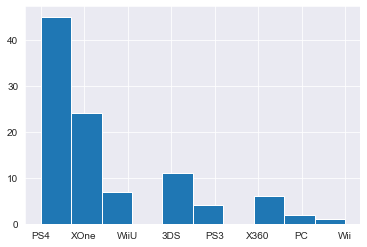

In [42]:
top100['Platform'].hist()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

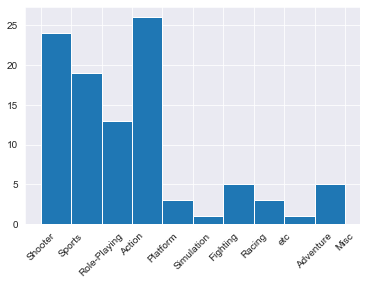

In [43]:
top100['Genre'].hist()
plt.xticks(rotation =45)

In [44]:
top100['Publisher'].value_counts()

Electronic Arts                           18
Nintendo                                  12
Ubisoft                                    9
Warner Bros. Interactive Entertainment     9
Take-Two Interactive                       8
Activision                                 8
Sony Computer Entertainment                7
Namco Bandai Games                         6
Bethesda Softworks                         6
Square Enix                                5
Microsoft Game Studios                     3
Level 5                                    2
Konami Digital Entertainment               1
Capcom                                     1
Sony Computer Entertainment Europe         1
Hello Games                                1
Slightly Mad Studios                       1
Mojang                                     1
mixi, Inc                                  1
Name: Publisher, dtype: int64

In [52]:
# 시장 규모의 차이
smaple = pd.DataFrame(columns=['Total_sales'])
smaple.loc['NA_Sales'] = df['NA_Sales'].sum()
smaple.loc['EU_Sales'] = df['EU_Sales'].sum()
smaple.loc['JP_Sales'] = df['JP_Sales'].sum()
smaple.loc['Other_Sales'] = df['Other_Sales'].sum()

In [46]:
percol(smaple)

<AxesSubplot:>

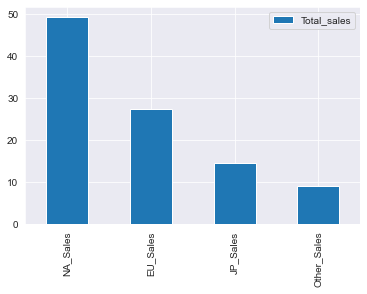

In [47]:
smaple.plot(kind='bar')

In [53]:
smaple

Total_sales
NA_Sales         4388.79
EU_Sales         2432.08
JP_Sales         1290.91
Other_Sales       796.55

In [49]:
# 'NA' 판매량이 평균 약 0.26으로 가장 높다.
df.describe()

Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  16588.000000  16588.000000  16588.000000  16588.000000  16588.000000   
mean    2135.535688      0.264576      0.146617      0.077822      0.048020   
std     1007.723718      0.816763      0.505466      0.309379      0.188577   
min     1980.000000      0.000000      0.000000      0.000000      0.000000   
25%     2003.000000      0.000000      0.000000      0.000000      0.000000   
50%     2007.000000      0.080000      0.020000      0.000000      0.010000   
75%     2011.000000      0.240000      0.110000      0.040000      0.040000   
max     9999.000000     41.490000     29.020000     10.220000     10.570000   

        Total_Sales  
count  16588.000000  
mean       0.537035  
std        1.555479  
min        0.000000  
25%        0.060000  
50%        0.170000  
75%        0.470000  
max       82.740000

<AxesSubplot:xlabel='NA_Sales', ylabel='Genre'>

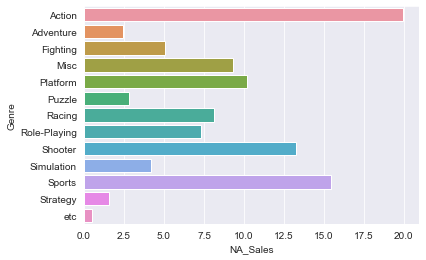

In [50]:
# 'Action', 'Sports', 'Shooter' 순으로 선호도가 높다.
sns.barplot(data=df_gen, x='NA_Sales', y=df_gen.index)

In [57]:
b = df[df['Platform'].str.contains('PS4')]

In [65]:
b

Name Platform    Year  \
18                                 Grand Kingdom      PS4  2015.0   
56                      Sébastien Loeb Rally Evo      PS4  2016.0   
68         Sherlock Holmes: Crimes & Punishments      PS4  2014.0   
117           Jikkyou Powerful Pro Baseball 2016      PS4  2016.0   
132    Rabbids Invasion: The Interactive TV Show      PS4  2014.0   
...                                          ...      ...     ...   
16369                                     NHL 17      PS4  2016.0   
16439                            Far Cry: Primal      PS4  2016.0   
16548                            Dead or Alive 5      PS4  2015.0   
16571                               Koihime Enbu      PS4  2016.0   
16576                           Yoru no Nai Kuni      PS4  2015.0   

              Genre                     Publisher  NA_Sales  EU_Sales  \
18     Role-Playing          Nippon Ichi Software      0.02      0.00   
56           Racing               Milestone S.r.l      0.00      0.04   
68        Adventure        Focus Home Interactive      0.08      0.14   
117          Sports  Konami Digital Entertainment      0.00      0.00   
132            Misc                       Ubisoft      0.00      0.01   
...             ...                           ...       ...       ...   
16369        Sports               Electronic Arts      0.13      0.04   
16439        Action                       Ubisoft      0.59      1.16   
16548      Fighting                    Tecmo Koei      0.09      0.13   
16571      Fighting                          Yeti      0.00      0.00   
16576  Role-Playing                    Tecmo Koei      0.00      0.00   

       JP_Sales  Other_Sales  Total_Sales  
18         0.03         0.00         0.05  
56         0.00         0.01         0.05  
68         0.00         0.05         0.27  
117        0.17         0.00         0.17  
132        0.00         0.00         0.01  
...         ...          ...          ...  
16369      0.00         0.04         0.21  
16439      0.06         0.33         2.14  
16548      0.08         0.04         0.34  
16571      0.02         0.00         0.02  
16576      0.08         0.00         0.08  

[336 rows x 10 columns]

In [67]:
b['Genre'].value_counts()

Action          121
Role-Playing     47
Sports           43
Shooter          34
Adventure        19
Racing           17
Fighting         17
Misc             15
Platform         11
Simulation        5
Strategy          5
Puzzle            1
etc               1
Name: Genre, dtype: int64

In [69]:
hey = pd.DataFrame(columns=['Genre'])
hey.loc['Action'] = b['Genre'].value_counts()[0]
hey.loc['Role-Playing'] = b['Genre'].value_counts()[1]
hey.loc['Sports'] = b['Genre'].value_counts()[2]
hey.loc['Shooter'] = b['Genre'].value_counts()[3]

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Role-Playing'),
  Text(2, 0, 'Sports'),
  Text(3, 0, 'Shooter')])

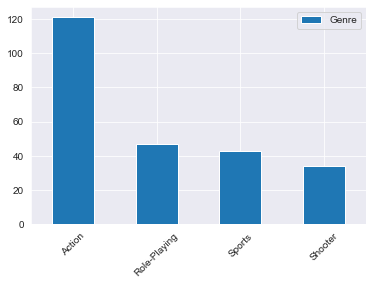

In [74]:
hey.plot(kind='bar')
plt.xticks(rotation =45)